 Dans le contexte de l’ingénierie des caractéristiques pour la prédiction, vous pourriez considérer un algorithme non supervisé comme une technique de « découverte de caractéristiques ».
 
 `Clustering` signifie simplement l’attribution de points de données à des groupes en fonction de la similitude des points les uns avec les autres. Un algorithme de clustering fait que « les oiseaux d’une plume se rassemblent », pour ainsi dire.
 
 ### k-Means Clustering
 `K-means` Le clustering mesure la similarité en utilisant la distance linéaire ordinaire (distance euclidienne, en d’autres termes). Il crée des clusters en plaçant un certain nombre de points, appelés centroïdes, à l’intérieur de l’espace d’entités. Chaque point du jeu de données est affecté au cluster du centroïde le plus proche. Le « k » dans « k-means » est le nombre de centroïdes (c’est-à-dire de clusters) qu’il crée.
 
 Chaque centroïde capturant des points à travers une séquence de cercles rayonnants. Lorsque des ensembles de cercles de centroïdes concurrents se chevauchent, ils forment une ligne. Le résultat est ce qu’on appelle une « tessallation de Voronoï ». La tessallation montre à quels clusters les données futures seront affectées; La tessallation est essentiellement ce que K-Means apprend de ses données d’entraînement.
 
 C’est un processus simple en deux étapes. L’algorithme commence par initialiser aléatoirement un nombre prédéfini ('n_clusters') de centroïdes. Il itére ensuite sur ces deux opérations :

1. Attribuer des points au centroïde de cluster le plus proche
2. déplacer chaque centroïde pour minimiser la distance à ses points
Il itére sur ces deux étapes jusqu’à ce que les centroïdes ne bougent plus, ou jusqu’à ce qu’un certain nombre maximum d’itérations ait passé ('max_iter').

Il arrive souvent que la position aléatoire initiale des centroïdes se termine par un mauvais clustering. Pour cette raison, l’algorithme répète un certain nombre de fois ('n_init') et renvoie le clustering qui a la plus petite distance totale entre chaque point et son centroïde, le clustering optimal.

**Pour de meilleures performances** augmentez le « max_iter » pour un grand nombre de clusters ou le « n_init » pour un jeu de données complexe. Habituellement, le seul paramètre dont nous aurons besoin pour choisir vous-même est n_clusters (k, c’est-à-dire). Le meilleur partitionnement pour un ensemble de fonctionnalités dépend du modèle que nous utilisons et de ce que nous essayons de prédire, il est donc préférable de l’ajuster comme n’importe quel hyperparamètre (par validation croisée).

À propos de ce fichier
1. longitude : Mesure de la distance à l’ouest d’une maison; Une valeur plus élevée est plus à l’ouest

2. latitude : Mesure de la distance au nord d’une maison; Une valeur plus élevée est plus au nord

3. housing_median_age : Âge moyen d’une maison dans un pâté de maisons; Un nombre inférieur est un bâtiment plus récent

4. total_rooms : Nombre total de lits dans un bloc

5. total_bedrooms : Nombre total de chambres dans un bloc

6. population : Nombre total de personnes résidant dans un îlot

7. households : Nombre total de ménages, un groupe de personnes résidant dans une unité d’accueil, pour un bloc

8. median_income : Revenu moyen des ménages vivant dans un bloc de maisons (mesuré en dizaines de milliers de dollars américains)

9. median_house_value : Valeur moyenne des maisons pour les ménages d’un îlot (mesurée en dollars américains)

10. ocean_proximity : Emplacement de la maison w.r.t océan / mer



In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [7]:
df = pd.read_csv("housing.csv")
df.head(20640)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [29]:
df.shape

(20640, 10)

In [30]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [32]:
df1=df
df1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0.4526,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0.3585,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0.3521,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0.3413,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0.3422,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0.0781,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0.0771,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0.0923,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0.0847,INLAND


In [33]:
df1["median_house_value"]=df1["median_house_value"]/1000

In [41]:
dummy_df=pd.get_dummies(df1["ocean_proximity"])
dummy_df

KeyError: 'ocean_proximity'

In [37]:
df1=df1.drop("ocean_proximity",axis=1)
df1=pd.concat([df1,dummy_df],axis=1)
df1.head(2)
# X = df.loc[:, ["median_income", "latitude", "longitude"]]
# X.head()

KeyError: 'ocean_proximity'

In [39]:
df1.dropna(inplace=True)

In [40]:
X=df1

Étant donné que le clustering k-means est sensible à l’échelle, il peut être judicieux de redimensionner ou de normaliser les données avec des valeurs extrêmes. Nos fonctionnalités sont déjà à peu près à la même échelle, nous allons donc les laisser telles quelles.

## Méthode du coude
##### Trouver le nombre optimal de clusters

In [23]:
sse = [] #SOMME DES ERREURS AU CARRÉ
for k in range(1,21):
    km = KMeans(n_clusters=k, n_init=10,random_state=2)
    
    km.fit(X)
    sse.append(km.inertia_)

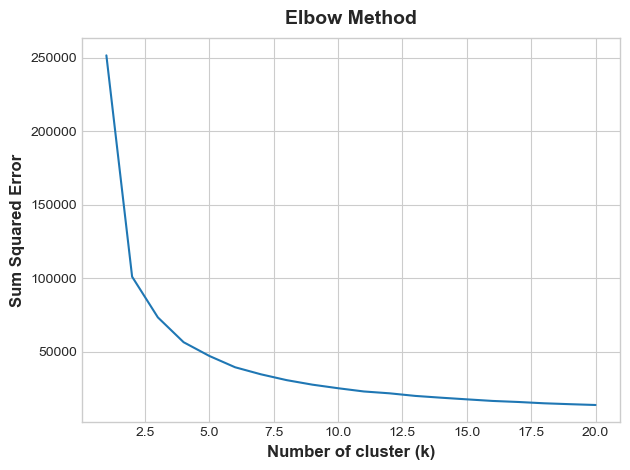

In [24]:
g=sns.lineplot(x=range(1,21), y=sse)

g.set(xlabel ="Number of cluster (k)", ylabel = "Sum Squared Error", title ='Elbow Method')

plt.show()

###  Créer une fonctionnalité de cluster
 n = 2

In [15]:
kmeans = KMeans(n_clusters=2,n_init=25, random_state=2)

X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Regardons maintenant quelques intrigues pour voir à quel point cela a été efficace. Tout d’abord, un nuage de points qui montre la répartition géographique des amas. Il semble que l’algorithme ait créé des segments distincts pour les zones à revenu élevé sur les côtes.

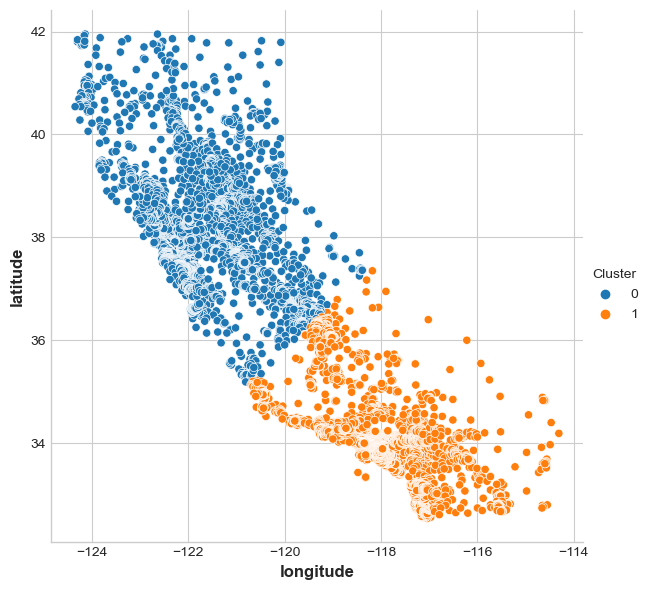

In [31]:
sns.relplot(x="longitude", y="latitude", hue="Cluster", data=X, height=6)
plt.show()

In [13]:
fig=plt.figure()
fig=px.scatter_3d(X,x='longitude',y='latitude',z='population',color='cluster')
fig.show()

ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity'] but received: cluster

<Figure size 640x480 with 0 Axes>

La cible de cet ensemble de données est « MedHouseVal » (valeur médiane des maisons). Ces box-plots montrent la distribution de la cible au sein de chaque cluster. Si le regroupement est informatif, ces distributions devraient, pour la plupart, se séparer dans 'MedHouseVal'

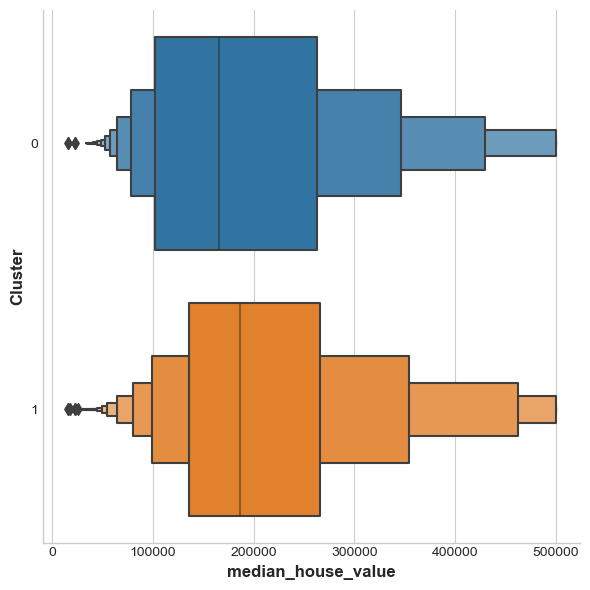

In [32]:
X["median_house_value"] = df["median_house_value"]
sns.catplot(x="median_house_value", y="Cluster", data=X, kind="boxen", height=6)
plt.show()